In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('/Users/minhkhoa/Downloads/cars_processed_.csv')
df

,brand,engine_capacity,fuels,km_driven,model,origin,price,seats,transmission,type,year
0,bmw,2.0,gasoline,60000.0,bmw 7,imported,2380000000,4,automatic,sedan,2015.0
1,bmw,2.0,gasoline,57000.0,bmw 3,imported,929000000,4,automatic,sedan,2016.0
2,bmw,2.0,gasoline,60000.0,bmw 5,imported,1255000000,4,automatic,sedan,2016.0
3,bmw,2.0,gasoline,28500.0,bmw 3,imported,1199000000,4,automatic,sedan,2016.0
4,bmw,2.0,gasoline,45000.0,bmw 3,imported,920000000,4,automatic,sedan,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
36199,toyota,1.5,gasoline,32000.0,toyota vios,domestic,495000000,5,automatic,sedan,2019.0
36200,honda,1.9,gasoline,23000.0,honda hrv,imported,726000000,5,automatic,suv,2019.0
36201,kia,1.1,gasoline,123456.0,kia morning,domestic,139000000,5,manual,hatchback,2010.0
36202,toyota,2.5,gasoline,35607.0,toyota fortuner,imported,850000000,7,automatic,suv,2017.0


In [4]:
df.year = df.year.astype('int')

<AxesSubplot:>

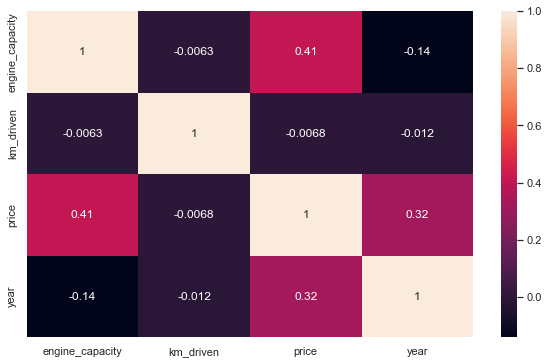

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [6]:
df

,brand,engine_capacity,fuels,km_driven,model,origin,price,seats,transmission,type,year
0,bmw,2.0,gasoline,60000.0,bmw 7,imported,2380000000,4,automatic,sedan,2015
1,bmw,2.0,gasoline,57000.0,bmw 3,imported,929000000,4,automatic,sedan,2016
2,bmw,2.0,gasoline,60000.0,bmw 5,imported,1255000000,4,automatic,sedan,2016
3,bmw,2.0,gasoline,28500.0,bmw 3,imported,1199000000,4,automatic,sedan,2016
4,bmw,2.0,gasoline,45000.0,bmw 3,imported,920000000,4,automatic,sedan,2016
...,...,...,...,...,...,...,...,...,...,...,...
36199,toyota,1.5,gasoline,32000.0,toyota vios,domestic,495000000,5,automatic,sedan,2019
36200,honda,1.9,gasoline,23000.0,honda hrv,imported,726000000,5,automatic,suv,2019
36201,kia,1.1,gasoline,123456.0,kia morning,domestic,139000000,5,manual,hatchback,2010
36202,toyota,2.5,gasoline,35607.0,toyota fortuner,imported,850000000,7,automatic,suv,2017


In [7]:
quantity_by_brand = df.groupby('brand').agg('count').year.reset_index().sort_values('year', ascending=False)
quantity_by_brand

,brand,year
13,toyota,8270
3,ford,4544
6,kia,4204
5,hyundai,3816
8,mazda,3147
9,mercedes,3061
4,honda,2793
1,chevrolet,1781
10,mitsubishi,1730
11,nissan,652


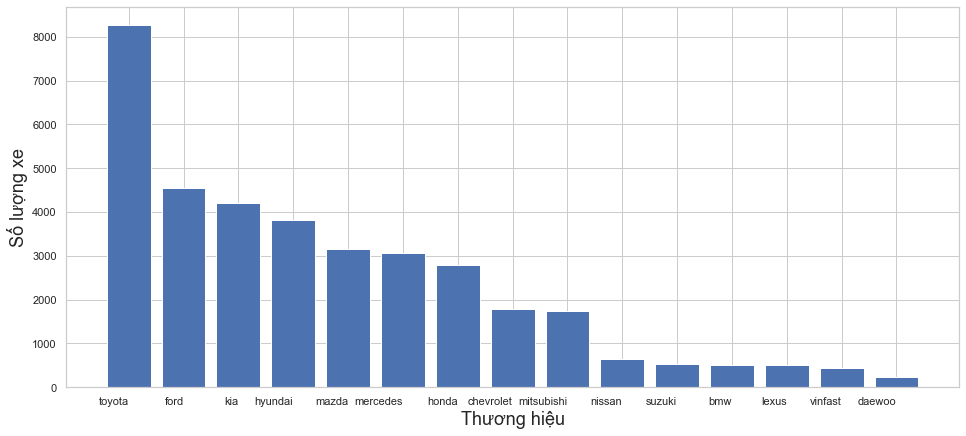

In [8]:
plt.figure(figsize=(16,7))
plt.bar('brand', 'year', data=quantity_by_brand[:20])
plt.xticks(rotation=0, ha='right')
plt.ylabel('Số lượng xe', fontsize=18)
plt.xlabel('Thương hiệu', fontsize=18)
plt.show()

Text(0.5, 0, 'Thương hiệu')

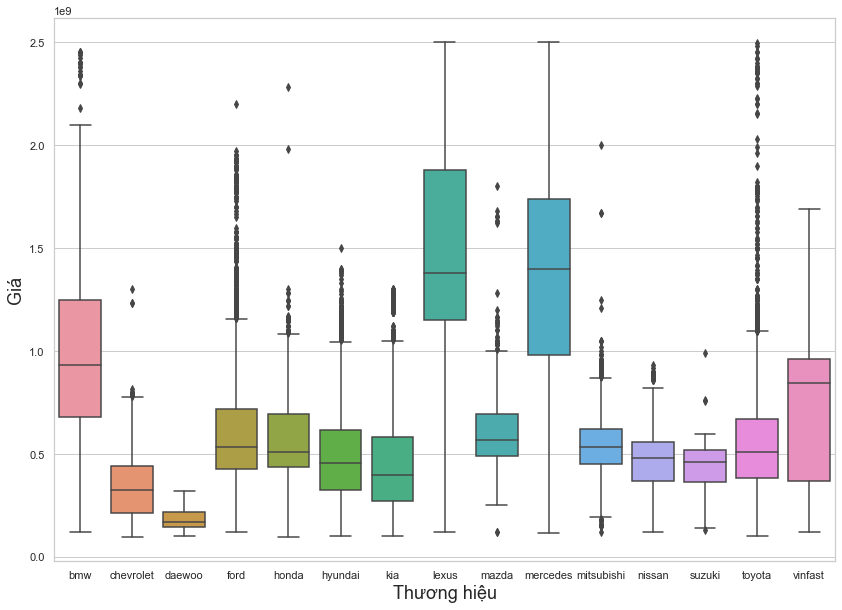

In [9]:
plt.figure(figsize=(14,10))
sns.boxplot(x='brand', y='price', data=df)
plt.ylabel('Giá', fontsize=18)
plt.xlabel('Thương hiệu', fontsize=18)

In [10]:
df.groupby('brand').agg({'year': 'count', })

,year
brand,
bmw,518
chevrolet,1781
daewoo,241
ford,4544
honda,2793
hyundai,3816
kia,4204
lexus,497
mazda,3147


In [11]:
df[(df.brand == 'ford') & (df.price > 1500000000)].sort_values(by='price', ascending=False).model.unique()

array(['ford explorer', 'ford everest', 'ford tourneo'], dtype=object)

In [12]:
df[(df.brand == 'toyota') & (df.price > 1500000000)].sort_values(by='price', ascending=False).model.unique()

array(['toyota land cruiser', 'toyota sienna', 'toyota prado',
       'toyota camry'], dtype=object)

In [13]:
quantity_by_fuel = df.groupby('fuels').agg('count').year.reset_index()
quantity_by_origin = df.groupby('origin').agg('count').year.reset_index()
quantity_by_transmission = df.groupby('transmission').agg('count').year.reset_index()
quantity_by_type = df.groupby('type').agg('count').year.reset_index()
quantity_by_year = df.groupby('year').agg('count').transmission.reset_index()

In [14]:
quantity_by_transmission

,transmission,year
0,automatic,27048
1,manual,9067
2,semi-automatic,89


<BarContainer object of 3 artists>

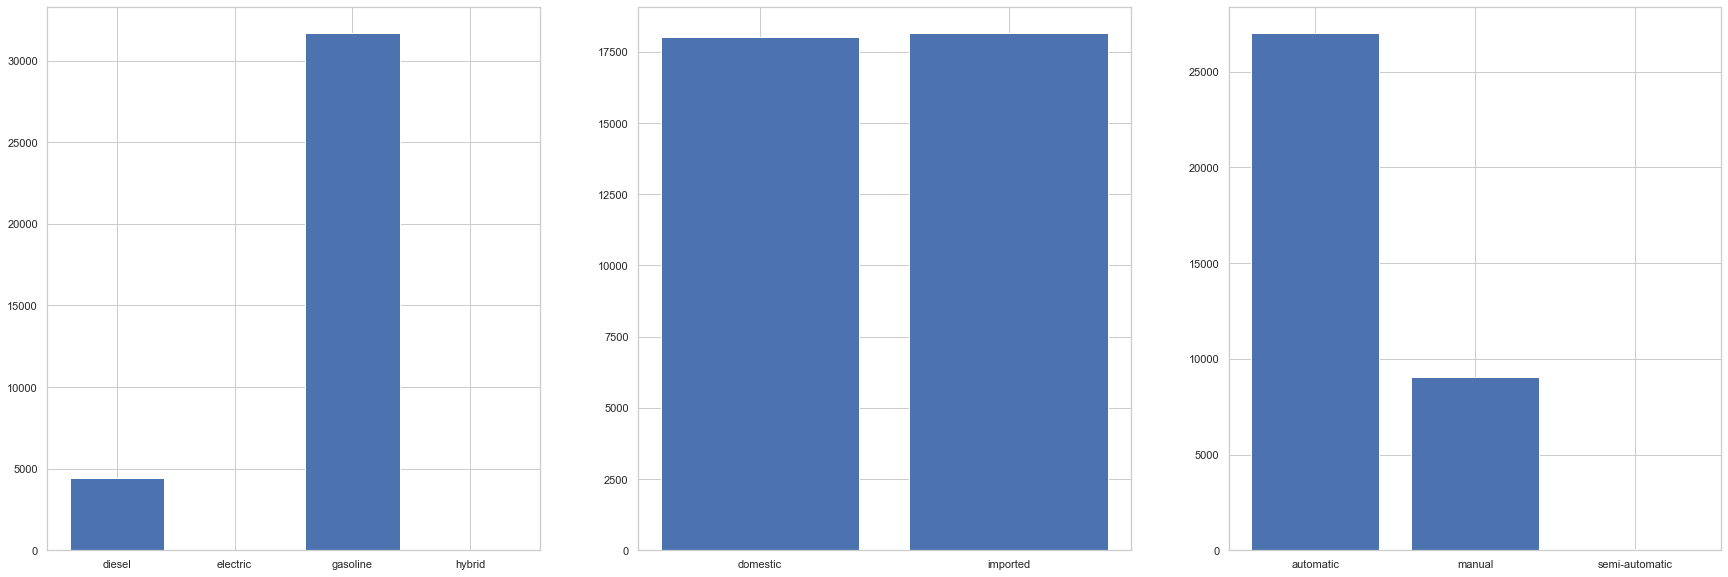

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,10))
ax1.bar('fuels', 'year', data=quantity_by_fuel)
ax2.bar('origin', 'year', data=quantity_by_origin)
ax3.bar('transmission', 'year', data=quantity_by_transmission)

Text(0.5, 0, 'Số lượng xe')

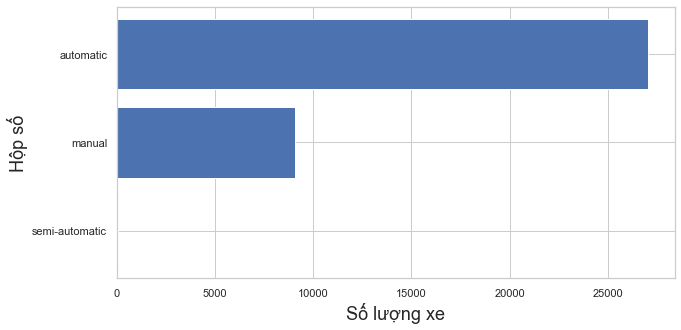

In [16]:
plt.figure(figsize=(10,5))
plt.barh('transmission', 'year', data=quantity_by_transmission.sort_values(by='year', ascending=True))
plt.ylabel('Hộp số', fontsize=18)
plt.xlabel('Số lượng xe', fontsize=18)

Text(0, 0.5, 'Số lượng xe')

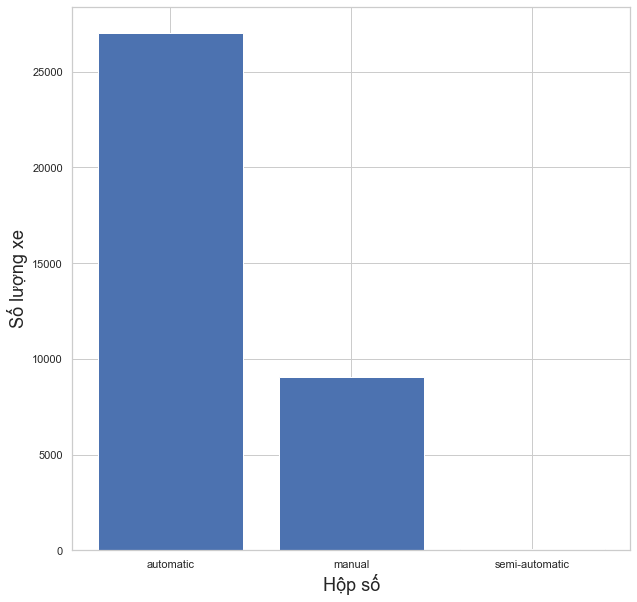

In [17]:
plt.figure(figsize=(10,10))
plt.bar(quantity_by_transmission.transmission, quantity_by_transmission.year)
plt.xlabel('Hộp số', fontsize=18)
plt.ylabel('Số lượng xe', fontsize=18)

/Users/minhkhoa/miniforge3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Số lượng xe')

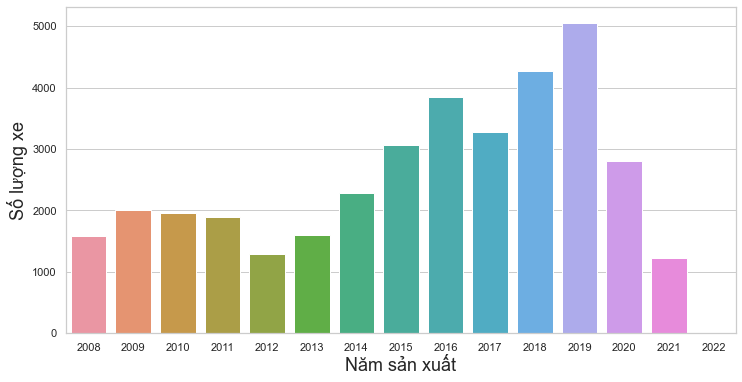

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(quantity_by_year.year, quantity_by_year.transmission)
plt.xlabel('Năm sản xuất', fontsize=18)
plt.ylabel('Số lượng xe', fontsize=18)

Text(0.5, 0, 'Số lượng xe')

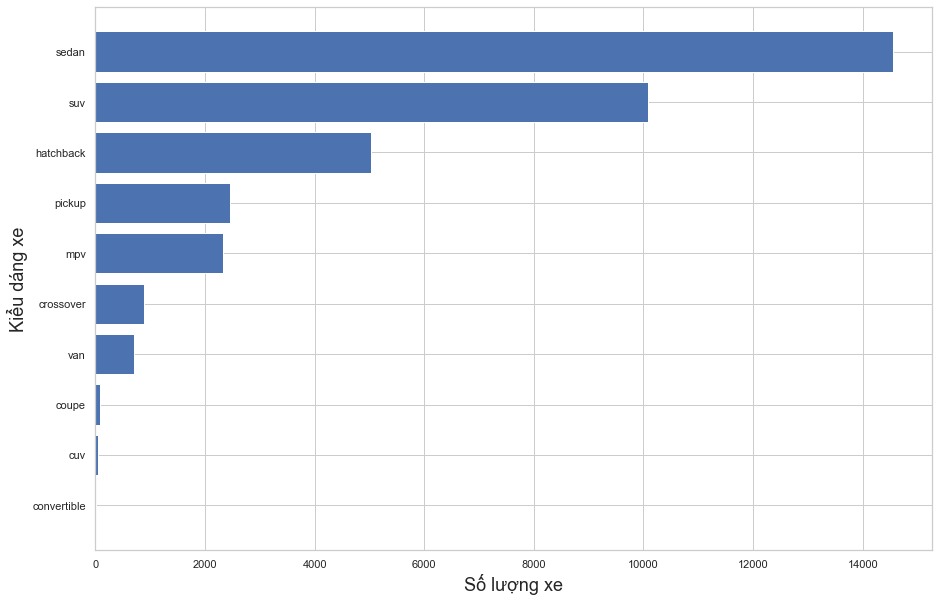

In [19]:
quantity_by_type.sort_values(by='year', ascending=True, inplace=True)

plt.figure(figsize=(15,10))
plt.barh(quantity_by_type.type, quantity_by_type.year)
plt.ylabel('Kiểu dáng xe', fontsize=18)
plt.xlabel('Số lượng xe', fontsize=18)

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

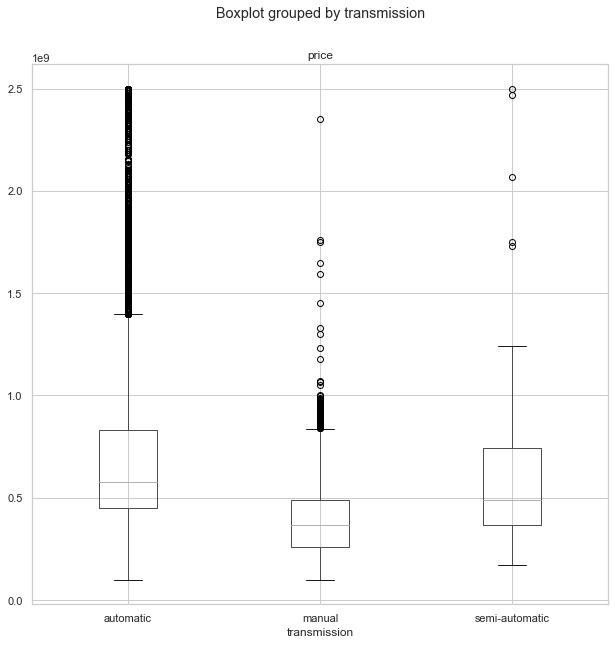

In [20]:
df.boxplot(by='transmission', column='price', figsize=(10,10))

In [21]:
a = df.groupby(['year', 'origin']).agg('count').brand.unstack()
a['total'] = a.domestic + a.imported
a['Sản xuất trong nước'] = a.domestic/a.total * 100
a['Nhập khẩu'] = a.imported/a.total * 100

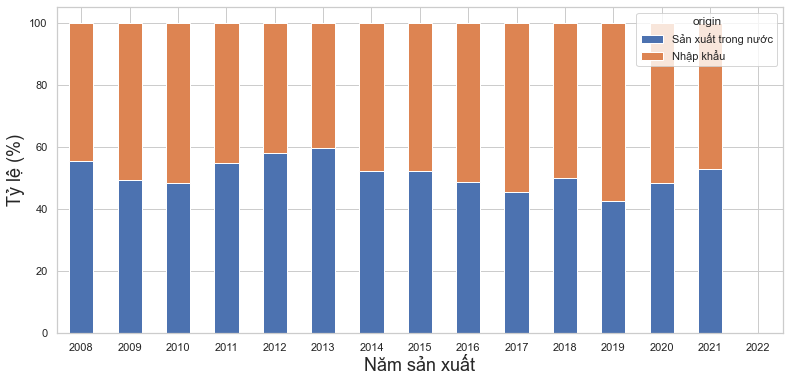

In [22]:
a.drop(['total', 'domestic', 'imported'], axis=1).plot(
    kind = 'bar',
    stacked = True,
    mark_right = True,
    rot = 0,
    figsize = (13,6)
)
#plt.title('Tỷ lệ giữa xe sản xuất trong nước và nhập khẩu qua từng năm', fontsize = 18)
plt.xlabel('Năm sản xuất', fontsize = 18)
plt.ylabel('Tỷ lệ (%)', fontsize = 18)
plt.grid(True, axis='y')
plt.show()

In [23]:
b = df.groupby(['year', 'transmission']).agg('count').brand.unstack()
b['total'] = b.automatic + b.manual + b['semi-automatic']
b['Tự động'] = b.automatic/b.total * 100
b['Bán tự động'] = b['semi-automatic']/b.total * 100
b['Số sàn'] = b.manual/b.total * 100

In [24]:
b

transmission,automatic,manual,semi-automatic,total,Tự động,Bán tự động,Số sàn
year,,,,,,,
2008,904.0,675.0,7.0,1586.0,56.998739,0.441362,42.559899
2009,1262.0,732.0,8.0,2002.0,63.036963,0.399600,36.563437
2010,1293.0,658.0,8.0,1959.0,66.003063,0.408372,33.588566
2011,1350.0,529.0,7.0,1886.0,71.580064,0.371156,28.048780
2012,914.0,378.0,2.0,1294.0,70.633694,0.154560,29.211747
2013,1159.0,442.0,4.0,1605.0,72.211838,0.249221,27.538941
2014,1739.0,546.0,2.0,2287.0,76.038478,0.087451,23.874071
2015,2218.0,850.0,5.0,3073.0,72.177026,0.162707,27.660267
2016,2660.0,1181.0,9.0,3850.0,69.090909,0.233766,30.675325


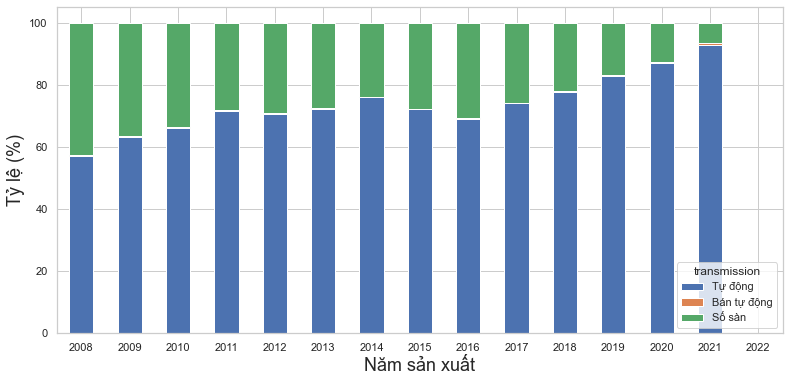

In [25]:
b.drop(['automatic', 'manual', 'semi-automatic', 'total'], axis=1).plot(
    kind = 'bar',
    stacked = True,
    mark_right = True,
    rot = 0,
    figsize = (13,6)
)

plt.grid(True, axis='y')
plt.xlabel('Năm sản xuất', fontsize = 18)
plt.ylabel('Tỷ lệ (%)', fontsize = 18)
#plt.title('Tỷ lệ giữa các loại hộp số qua từng năm', fontsize = 18)
plt.show()

In [26]:
df[df.brand == 'toyota'].sort_values(by='price', ascending=False)

,brand,engine_capacity,fuels,km_driven,model,origin,price,seats,transmission,type,year
8547,toyota,4.6,gasoline,80000.0,toyota land cruiser,imported,2498000000,5,automatic,suv,2013
8455,toyota,3.5,gasoline,38300.0,toyota sienna,imported,2480000000,5,automatic,van,2015
7853,toyota,3.5,gasoline,62000.0,toyota sienna,imported,2450000000,5,automatic,van,2016
8670,toyota,2.7,gasoline,111.0,toyota prado,imported,2450000000,5,automatic,suv,2016
8836,toyota,2.7,gasoline,6000.0,toyota prado,imported,2425000000,5,automatic,suv,2020
...,...,...,...,...,...,...,...,...,...,...,...
23318,toyota,1.5,gasoline,25800.0,toyota vios,imported,150000000,5,manual,sedan,2009
31065,toyota,2.0,gasoline,190000.0,toyota innova,domestic,148000000,8,manual,mpv,2008
24865,toyota,1.5,gasoline,222222.0,toyota vios,domestic,140000000,5,manual,hatchback,2021
23317,toyota,1.5,gasoline,19.0,toyota vios,imported,132000000,5,manual,sedan,2008


In [27]:
c = df.groupby('year').agg('mean').price.reset_index()

/Users/minhkhoa/miniforge3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


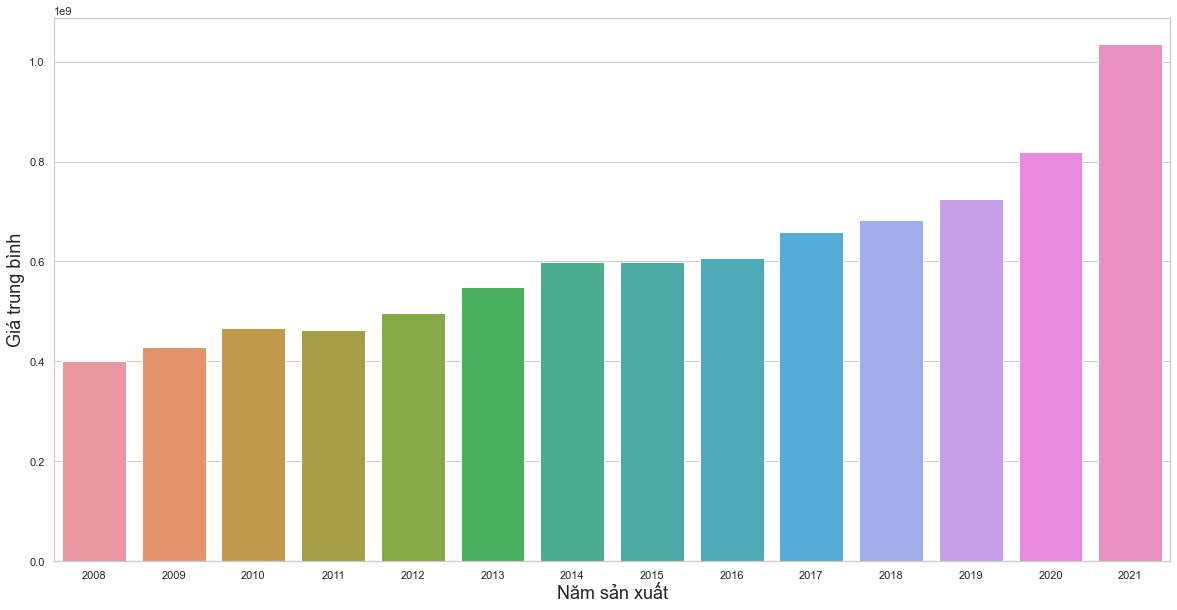

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(c[:-1].year, c[:-1].price)
plt.xlabel('Năm sản xuất', fontsize = 18)
plt.ylabel('Giá trung bình', fontsize = 18)
#plt.title('Giá xe cũ trung bình qua từng năm', fontsize = 18)
plt.show()

In [29]:
d = df.groupby('model').agg('mean').price.reset_index().sort_values(by='price', ascending=True)
d[:15]

,model,price
19,daewoo gentra,1.454000e+08
21,daewoo matiz,1.519389e+08
15,chevrolet spark duo,1.810377e+08
44,hyundai getz,1.904323e+08
20,daewoo lacetti,1.922775e+08
14,chevrolet spark,1.930454e+08
12,chevrolet lacetti,1.931923e+08
95,mercedes sprinter,1.957108e+08
18,chevrolet vivant,2.050323e+08
117,suzuki super carry van,2.088462e+08


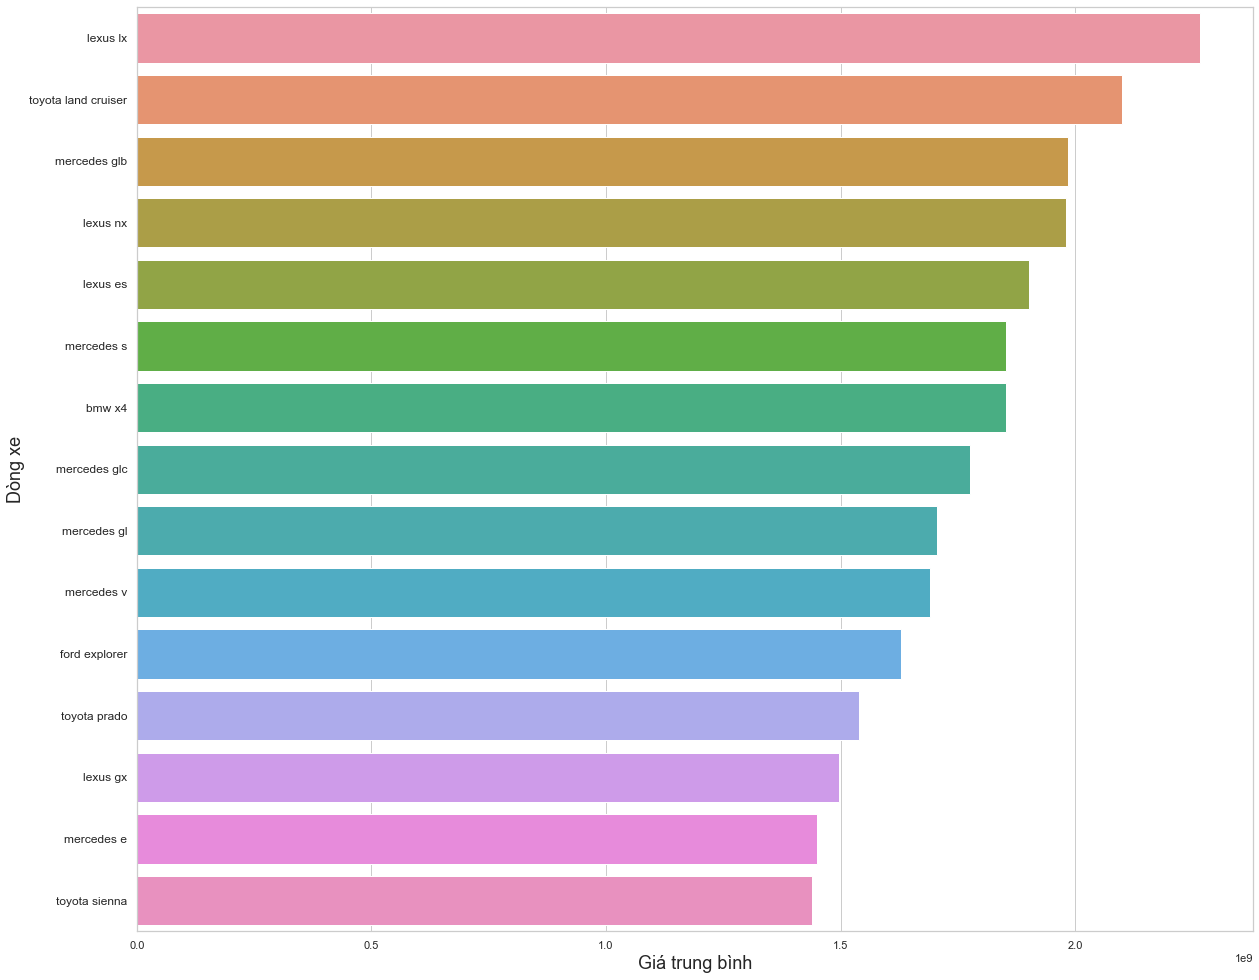

In [30]:
plt.figure(figsize=(20,17))
sns.barplot(y='model', x='price', data=d[-15:].sort_values(by='price', ascending=False))
plt.xlabel('Giá trung bình', fontsize = 18)
plt.ylabel('Dòng xe', fontsize = 18)
plt.yticks(fontsize=12)
plt.show()